# TP1 - Alberto F. Pluecker

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
penguins = pd.read_csv(url).dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## 1. Examine o dataset Palmer Penguins e explique o que são 'features' no contexto deste dataset específico. Discuta como as features influenciam o desempenho de um modelo de Machine Learning.

Features são as variáveis independentes de um dataset que alimentam os modelos de Machine Learning. No contexto do dataset Palmer Penguins, as features incluem:

- `species`: a espécie do pinguim.
- `island`: a ilha onde o pinguim foi encontrado.
- `bill_length_mm`: o comprimento do bico em milímetros.
- `bill_depth_mm`: a profundidade do bico em milímetros.
- `flipper_length_mm`: o comprimento da nadadeira em milímetros.
- `body_mass_g`: a massa corporal em gramas.
- `sex`: o sexo do pinguim.

As features influenciam o desempenho de um modelo de Machine Learning, ao determinar a quantidade e a qualidade da informação que o modelo pode usar para identificar padrões nos dados. Se as features são bem escolhidas e relevantes para a tarefa, o modelo tende a ter um desempenho melhor.

## 2. Com base nos dados do dataset Palmer Penguins, identifique exemplos de escalares, vetores e explique o conceito de espaços em Machine Learning.

- **Escalares:** São valores únicos, como `bill_length_mm` = 39.1 para um pinguim específico.
- **Vetores:** Um vetor pode ser uma linha do dataframe que representa todas as características de um pinguim específico, por exemplo: `[39.1, 18.7, 181, 3750, 'Adelie', 'Torgersen', 'Male']`.
- **Espaços:** Em Machine Learning, o espaço de features refere-se ao conjunto de todos os vetores possíveis. Cada ponto no espaço é uma instância dos dados, e a dimensionalidade do espaço é igual ao número de features.


## 3. Utilize a técnica de quantização com bins fixos para discretizar uma variável contínua do dataset Palmer Penguins. Explique a razão pela qual você escolheu essa variável e como a discretização pode afetar a análise.

Vamos discretizar a variável `bill_length_mm` usando a técnica de quantização com bins fixos.

`bill_length_mm` é uma variável contínua que pode ser útil para categorizar pinguins em grupos distintos com base no comprimento do bico.

Discretizar uma variável contínua pode simplificar a análise ao reduzir a variabilidade, mas também pode levar à perda de informação. Ao categorizar `bill_length_mm`, podemos identificar padrões mais facilmente, mas perdemos a precisão dos dados originais.

In [6]:
bins_fixed = pd.cut(penguins['bill_length_mm'], bins=5, labels=False)
penguins['bill_length_bins_fixed'] = bins_fixed
penguins[['bill_length_mm', 'bill_length_bins_fixed']].head()

,bill_length_mm,bill_length_bins_fixed
0,39.1,1.0
1,39.5,1.0
2,40.3,1.0
3,NaN,NaN
4,36.7,0.0


## 4. Aplique a técnica de quantização com bins variáveis em uma variável contínua do dataset Palmer Penguins. Compare os resultados com a discretização feita no exercício anterior.

A discretização com bins fixos divide a variável em intervalos de tamanho igual, enquanto a discretização com bins variáveis divide a variável em intervalos com quantidades iguais de dados. Isso pode proporcionar uma análise mais equilibrada quando a distribuição dos dados é desigual.

In [7]:
bins_variable = pd.qcut(penguins['bill_length_mm'], q=5, labels=False)
penguins['bill_length_bins_variable'] = bins_variable
penguins[['bill_length_mm', 'bill_length_bins_variable']].head()

,bill_length_mm,bill_length_bins_variable
0,39.1,1.0
1,39.5,1.0
2,40.3,1.0
3,NaN,NaN
4,36.7,0.0


## 5. Aplique a FunctionTransformer do Scikit-Learn em uma variável do dataset Palmer Penguins. Descreva o processo e explique como essa transformação pode ser benéfica.

Vamos aplicar a `FunctionTransformer` para escalar a variável `body_mass_g` usando uma transformação logarítmica.

In [22]:
log_transformer = FunctionTransformer(np.log1p, validate=True)
penguins['log_body_mass_g'] = log_transformer.transform(penguins[['body_mass_g']])
penguins[['body_mass_g', 'log_body_mass_g']].head()

/home/albertofp/github/infnet/bloco6/tp1/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,body_mass_g,log_body_mass_g
0,3750.0,8.229778
1,3800.0,8.243019
2,3250.0,8.086718
4,3450.0,8.146419
5,3650.0,8.202756


## 6. Utilize a PowerTransformer do Scikit-Learn para transformar uma variável do dataset Palmer Penguins. Discuta os benefícios dessa transformação.

O `PowerTransformer` visa transformar os dados para aproximar uma distribuição normal, o que pode melhorar o desempenho de modelos sensíveis a distribuições normais.

In [15]:
power_transformer = PowerTransformer()
penguins['power_flipper_length_mm'] = power_transformer.fit_transform(penguins[['flipper_length_mm']])
penguins[['flipper_length_mm', 'power_flipper_length_mm']].head()

,flipper_length_mm,power_flipper_length_mm
0,181.0,-1.599227
1,186.0,-1.116522
2,195.0,-0.343848
4,193.0,-0.505776
5,190.0,-0.758838


## 7. Aplique a normalização Min-Max do Scikit-Learn em uma ou mais variáveis do dataset Palmer Penguins. Explique como essa normalização impacta o modelo de Machine Learning.

A normalização Min-Max escala os dados para um intervalo [0, 1], preservando as relações entre valores e é útil para algoritmos baseados em distância.

In [23]:
min_max_scaler = MinMaxScaler()
penguins['minmax_bill_depth_mm'] = min_max_scaler.fit_transform(penguins[['bill_depth_mm']])
penguins[['bill_depth_mm', 'minmax_bill_depth_mm']].head()

,bill_depth_mm,minmax_bill_depth_mm
0,18.7,0.666667
1,17.4,0.511905
2,18.0,0.583333
4,19.3,0.738095
5,20.6,0.892857


## 8. Utilize o StandardScaler do Scikit-Learn para normalizar variáveis do dataset Palmer Penguins. Discuta a diferença entre esta técnica e a normalização Min-Max.

O `StandardScaler` padroniza os dados subtraindo a média e dividindo pelo desvio padrão, resultando em dados com média zero e variância um.  O Min-Max não leva em consideração a média e desvio padrão em seu cálculo.

In [24]:
standard_scaler = StandardScaler()
penguins['standard_bill_depth_mm'] = standard_scaler.fit_transform(penguins[['bill_depth_mm']])
penguins[['bill_depth_mm', 'standard_bill_depth_mm']].head()

,bill_depth_mm,standard_bill_depth_mm
0,18.7,0.780732
1,17.4,0.119584
2,18.0,0.424729
4,19.3,1.085877
5,20.6,1.747026


## 9. Implemente um modelo de regressão linear com regularização norma-L2 utilizando o dataset Palmer Penguins.

Escolhi implementar um modelo de regressão linear Ridge na variável `body_mass_g`.

A regularização L2 adiciona uma penalização à magnitude dos coeficientes, reduzindo o overfitting ao simplificando o modelo.

In [25]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
target = 'body_mass_g'

# Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(penguins[features], penguins[target], test_size=0.2, random_state=42)

# Instanciar e ajustar o modelo Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predizer e calcular o erro quadrático médio
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

mse

np.float64(127204.37997248198)

## 10. Utilize a FunctionTransformer do Scikit-Learn para aplicar múltiplas transformações em sequência a uma variável do dataset Palmer Penguins. Por exemplo, aplique uma transformação logarítmica seguida por uma transformação exponencial inversa. Explique os passos realizados e analise como essas transformações impactam a distribuição da variável transformada.

Aplicaremos as transformações logarítmica e exponencial inversa à variável `body_mass_g`.

Aplicar transformações complexas pode modificar a distribuição dos dados, tornando-os mais adequados para certos algoritmos, mas também pode introduzir complexidade adicional.

In [29]:
log_transformer = FunctionTransformer(np.log1p, validate=True, feature_names_out='one-to-one')
inv_exp_transformer = FunctionTransformer(np.expm1, validate=True, feature_names_out='one-to-one')

log_transformed = log_transformer.transform(penguins[['body_mass_g']])
inv_exp_transformed = inv_exp_transformer.transform(log_transformed)

penguins['log_invexp_body_mass_g'] = inv_exp_transformed
penguins[['body_mass_g', 'log_invexp_body_mass_g']].head()

/home/albertofp/github/infnet/bloco6/tp1/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,body_mass_g,log_invexp_body_mass_g
0,3750.0,3750.0
1,3800.0,3800.0
2,3250.0,3250.0
4,3450.0,3450.0
5,3650.0,3650.0


## 11. Aplique a PowerTransformer do Scikit-Learn a uma variável do dataset Palmer Penguins. Em seguida, aplique uma transformação alternativa, como a normalização z-score (StandardScaler). Compare as distribuições resultantes das variáveis transformadas usando gráficos e estatísticas descritivas. Discuta as diferenças observadas e as situações em que cada técnica pode ser mais apropriada.

Vamos aplicar o `PowerTransformer` e o `StandardScaler` à variável `flipper_length_mm` e comparar os resultados. O `PowerTransformer` é usado para transformar os dados para que se aproximem de uma distribuição normal, enquanto o `StandardScaler` padroniza os dados subtraindo a média e dividindo pelo desvio padrão.

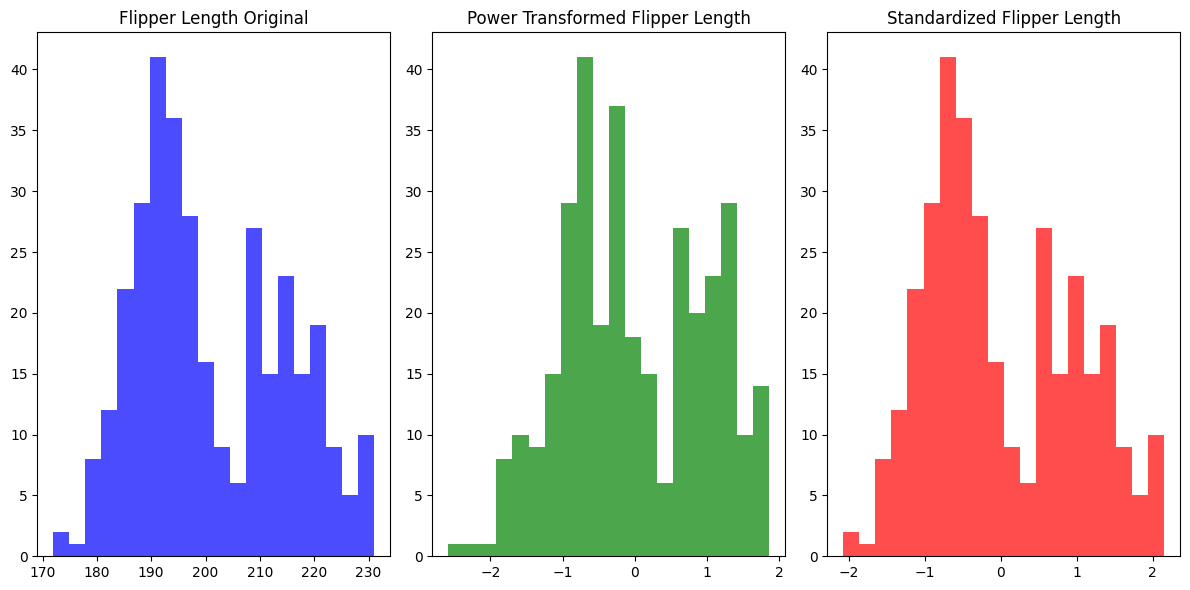

In [30]:
power_transformer = PowerTransformer()
standard_scaler = StandardScaler()


power_transformed = power_transformer.fit_transform(penguins[['flipper_length_mm']])
standard_transformed = standard_scaler.fit_transform(penguins[['flipper_length_mm']])

penguins['power_flipper_length_mm'] = power_transformed
penguins['standard_flipper_length_mm'] = standard_transformed

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(penguins['flipper_length_mm'], bins=20, color='blue', alpha=0.7)
plt.title('Flipper Length Original')

plt.subplot(1, 3, 2)
plt.hist(penguins['power_flipper_length_mm'], bins=20, color='green', alpha=0.7)
plt.title('Power Transformed Flipper Length')

plt.subplot(1, 3, 3)
plt.hist(penguins['standard_flipper_length_mm'], bins=20, color='red', alpha=0.7)
plt.title('Standardized Flipper Length')

plt.tight_layout()
plt.show()

O PowerTransformer transforma os dados para que se aproximem de uma distribuição normal, o que pode ser benéfico para modelos que assumem normalidade dos dados. O StandardScaler ajusta a escala dos dados, mas não altera a forma da distribuição, sendo útil quando a normalidade não é crítica, mas a variabilidade na escala deve ser controlada.

## 12. Aplique a normalização Min-Max do Scikit-Learn a uma variável contínua do dataset Palmer Penguins. Visualize os dados normalizados e compare com os dados originais. Explique como a normalização Min-Max influencia a visualização dos dados e a comparação entre diferentes variáveis.

A normalização Min-Max ajusta os dados para um intervalo [0, 1], permitindo a comparação direta entre diferentes variáveis em termos relativos. Vamos aplicar esta técnica à variável `flipper_length_mm` e visualizar os resultados.

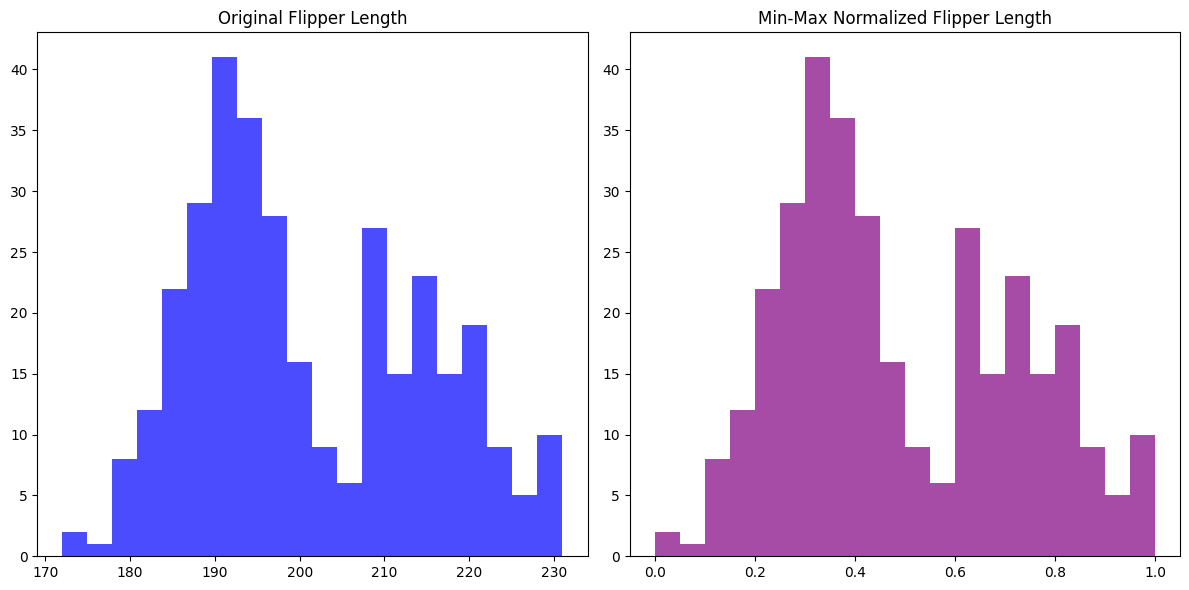

In [31]:
min_max_scaler = MinMaxScaler()

# Normalizar a variável flipper_length_mm
minmax_transformed = min_max_scaler.fit_transform(penguins[['flipper_length_mm']])

# Adicionar a variável normalizada ao DataFrame
penguins['minmax_flipper_length_mm'] = minmax_transformed

# Visualizar dados normalizados e originais
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(penguins['flipper_length_mm'], bins=20, color='blue', alpha=0.7)
plt.title('Original Flipper Length')

plt.subplot(1, 2, 2)
plt.hist(penguins['minmax_flipper_length_mm'], bins=20, color='purple', alpha=0.7)
plt.title('Min-Max Normalized Flipper Length')

plt.tight_layout()
plt.show()

A normalização Min-Max ajusta os dados para um intervalo padrão, o que é particularmente útil para redes neurais, onde a escala relativa dos dados pode influenciar os resultados. A visualização dos dados após a normalização facilita a comparação entre diferentes variáveis, pois todas são ajustadas para o mesmo intervalo.